# Very simple interaction with IBM Quantum

## Define the quantum circuit

In [19]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)
qc.h(0)

qc.measure([0,1,2], [0,1,2])
qc.draw()

┌───┐   ┌─┐
q_0: ┤ H ├───┤M├
     └┬─┬┘   └╥┘
q_1: ─┤M├─────╫─
      └╥┘ ┌─┐ ║ 
q_2: ──╫──┤M├─╫─
       ║  └╥┘ ║ 
c: 3/══╩═══╩══╩═
       1   2  0

Hadamard gate $\mathbf{H}$ (method h) transforms qubit $|0\rangle$ into superposition

$$\mathbf{H}|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$$

## Test the circuit on local simulator

In [20]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'001': 525, '000': 499}

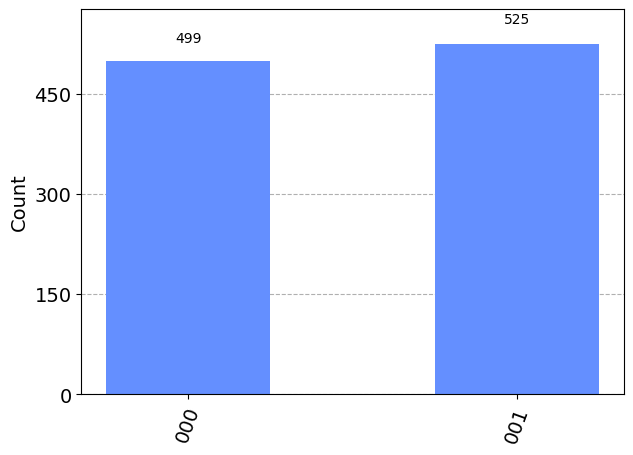

In [21]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

## Run on real hardware

In [14]:
# Get the API token in https://quantum-computing.ibm.com/
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="TOKEN")

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options

service = QiskitRuntimeService()

Least busy backend:

In [ ]:
backend = service.least_busy()
print(backend.name)
print(backend.num_qubits)
print(backend.simulator)
print(backend.backend_version)

save_account stores the API token to disk, hence it must be done only once after rotating the token. See https://github.com/Qiskit/qiskit-ibmq-provider for more details.

Available backends:

In [5]:
service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_oslo')>]

[Simulators overview](https://quantum-computing.ibm.com/lab/docs/iql/manage/simulator)

[Documentation of QiskitRuntimeService](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.QiskitRuntimeService.html)

Start a job with the quantum circuit:

In [15]:
backend = service.backend("ibmq_qasm_simulator")
options = Options()
options.execution.shots = 2048
sampler = Sampler(session=backend, options=options)
job = sampler.run(qc)
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cge1sq7knnn31q8iu5k0


Check the status of the running job:

In [16]:
print(f">>> Job Status: {job.status()}")

>>> Job Status: JobStatus.DONE


In [17]:
result = job.result()
print(result)

SamplerResult(quasi_dists=[{2: 0.1318359375, 4: 0.115234375, 6: 0.13037109375, 5: 0.125, 1: 0.1279296875, 3: 0.125, 0: 0.12744140625, 7: 0.1171875}], metadata=[{'header_metadata': {}, 'shots': 2048}])


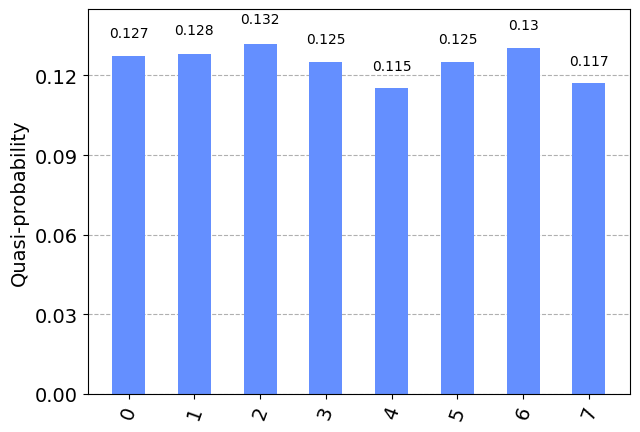

In [18]:
plot_histogram(result.quasi_dists)